In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
file_path = "D:/Crypto-Analyzer/Bitcoin USD (01-05.2024).csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.fillna(data.mean())

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [11]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)


C:\Users\Ankita\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+07, tolerance: 1.242e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [12]:
def calculate_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred


Linear Regression - MSE: 236628.28, R²: 0.96
Ridge Regression - MSE: 236628.28, R²: 0.96
Lasso Regression - MSE: 235468.11, R²: 0.96


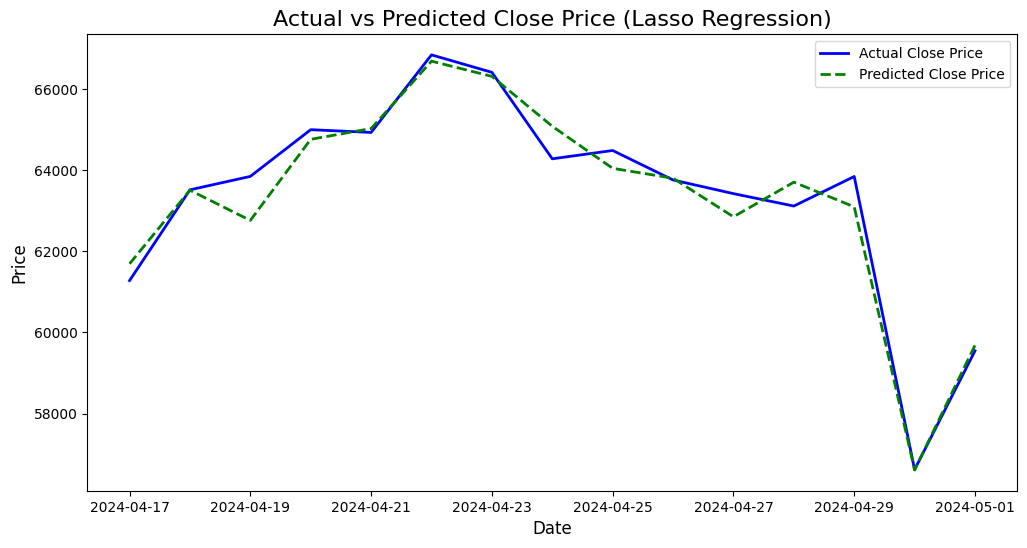

In [13]:
class PredictionDashboard(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Close Price Prediction")
        self.geometry("1200x800") 
        self.selected_model = tk.StringVar(value="Linear Regression")
        model_options = ["Linear Regression", "Ridge Regression", "Lasso Regression"]

        ttk.Label(self, text="Select Model:").pack(pady=10)
        self.model_dropdown = ttk.Combobox(self, textvariable=self.selected_model, values=model_options)
        self.model_dropdown.pack()

        self.start_date_var = tk.StringVar(value='2024-05-02')
        self.end_date_var = tk.StringVar(value=pd.to_datetime("now").strftime('%Y-%m-%d'))

        frame = ttk.Frame(self)
        frame.pack(pady=10)

        ttk.Label(frame, text="Start Date (YYYY-MM-DD):").grid(row=0, column=0, padx=10, pady=5, sticky='w')
        ttk.Entry(frame, textvariable=self.start_date_var).grid(row=0, column=1, padx=10, pady=5)

        ttk.Label(frame, text="End Date (YYYY-MM-DD):").grid(row=1, column=0, padx=10, pady=5, sticky='w')
        ttk.Entry(frame, textvariable=self.end_date_var).grid(row=1, column=1, padx=10, pady=5)

        ttk.Button(self, text="Show Prediction", command=self.show_prediction).pack(pady=20)

        self.fig, self.ax = plt.subplots(figsize=(15, 8)) 
        self.canvas = FigureCanvasTkAgg(self.fig, master=self)
        self.canvas.get_tk_widget().pack()

        self.result_label = ttk.Label(self, text="")
        self.result_label.pack(pady=10)

    def show_prediction(self):
        start_date = pd.to_datetime(self.start_date_var.get())
        end_date = pd.to_datetime(self.end_date_var.get())

        if start_date >= end_date:
            self.result_label.config(text="Invalid date range. Start date should be before the end date.")
            return


        X_future = X_test.loc[start_date:end_date]
        y_future = y_test.loc[start_date:end_date]

        if X_future.empty:
            self.result_label.config(text="No data available for the selected date range.")
            return


        selected_model_name = self.selected_model.get()

        if selected_model_name == "Linear Regression":
            model = linear_model
        elif selected_model_name == "Ridge Regression":
            model = ridge_model
        elif selected_model_name == "Lasso Regression":
            model = lasso_model


        mse, r2, y_pred = calculate_accuracy(model, X_future, y_future)

 
        self.ax.clear()

 
        self.ax.plot(X_future.index, y_future, label="Actual Close Price", color='blue', linewidth=2)
        self.ax.plot(X_future.index, y_pred, label="Predicted Close Price", color='green', linestyle='--', linewidth=2)
        self.ax.set_title(f"Actual vs Predicted Close Price ({selected_model_name})", fontsize=16)
        self.ax.set_xlabel("Date", fontsize=12)
        self.ax.set_ylabel("Price", fontsize=12)
        self.ax.legend()

        self.canvas.draw()

        self.result_label.config(text=f"{selected_model_name} - MSE: {mse:.2f}, R²: {r2:.2f}")
        print(f"{selected_model_name} - MSE: {mse:.2f}, R²: {r2:.2f}")

if __name__ == "__main__":
    app = PredictionDashboard()
    app.mainloop()
